In [1]:
# basic lib

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, plotly as px, warnings
warnings.filterwarnings('ignore')

# ml lib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data= pd.read_csv('Loan.csv')
pd.set_option('display.max_columns',None)
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
data.shape

(614, 13)

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.dropna(inplace= True)

In [6]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

### Label encoding

In [7]:
data.Loan_Status.value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [9]:
data.Loan_Status= data.Loan_Status.map({'N':0,'Y':1})

In [10]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [21]:
data.Gender= encoding.fit_transform(data.Gender)
data.Gender.value_counts()

Gender
1    394
0     86
Name: count, dtype: int64

In [26]:
data.Self_Employed= encoding.fit_transform(data.Self_Employed)
data.Self_Employed.value_counts()

Self_Employed
0    414
1     66
Name: count, dtype: int64

In [29]:
data.Property_Area= encoding.fit_transform(data.Property_Area)
data.Property_Area.value_counts()

Property_Area
1    191
2    150
0    139
Name: count, dtype: int64

In [32]:
data.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          0              0             4583   
2       1        1          0          0              1             3000   
3       1        1          0          1              0             2583   
4       1        0          0          0              0             6000   
5       1        1          2          0              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

In [12]:
# change 3+ to 3 or 4

data.Dependents= data.Dependents.replace(to_replace= '3+',value= 4)

In [15]:
data.Gender.dtype

dtype('int32')

In [17]:
data.Married.value_counts()

Married
1    311
0    169
Name: count, dtype: int64

In [31]:
data= data.drop('Loan_ID', axis= 1)

<Axes: xlabel='Education', ylabel='count'>

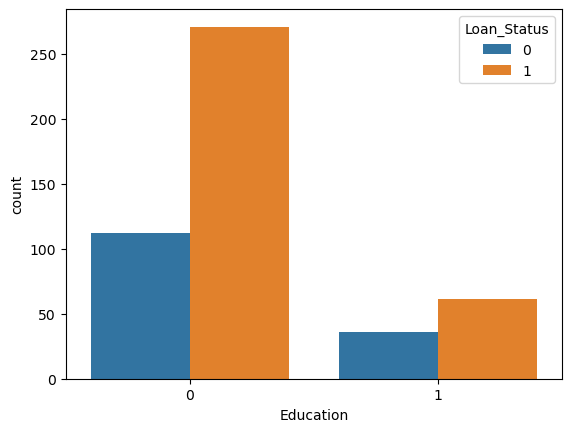

In [34]:
# visuvalization
sns.countplot(x= "Education", hue= "Loan_Status", data= data)

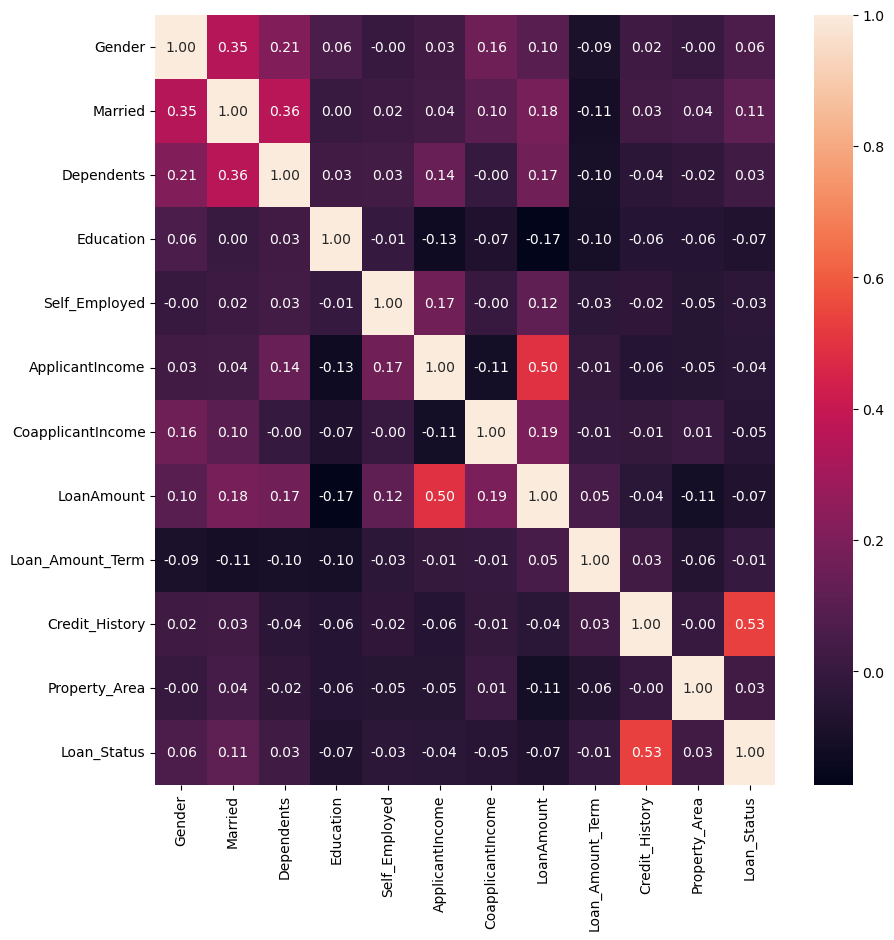

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

In [42]:
x= data.iloc[:,:-1]
y= data["Loan_Status"]

In [44]:
x_train, x_test, y_train, y_test= train_test_split(x, y, stratify= y, test_size= 0.2, random_state= 17)

In [45]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


In [46]:
svm= SVC(kernel= 'linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [47]:
y_train_pred= svm.predict(x_train)
print("accuracy_score -train data :", accuracy_score(y_train,y_train_pred))

accuracy_score -train data : 0.7734375


In [48]:
y_test_pred= svm.predict(x_test)
print("accuracy_score -test data :", accuracy_score(y_test,y_test_pred))

accuracy_score -test data : 0.71875
